### Homework Group 60 - Abhijit Anil (aa94375), Antra Sinha (as224589)

# Assignment 3 #
### Due: Monday, October 9th to be submitted via Canvas by 11:59 pm ###
### Total points: **90** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names, UT EIDs and the homework group.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

1. Homework Group -
2. Student Names -

## Q1. (30 points) - Comparing MLPs

In this problem, we will be comparing different MLP configurations on the California Housing dataset and the Diabetes dataset.

In [1]:
import numpy as np
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing, load_diabetes
import warnings
warnings.filterwarnings("ignore")

In [2]:
seed = 42

In [3]:
# Load the Calinifornia Housing dataset and do train/val/test split
california_housing = fetch_california_housing()
housing_X, housing_y = california_housing['data'], california_housing['target']
housing_X_train, housing_X_tmp, housing_y_train, housing_y_tmp = train_test_split(housing_X, housing_y, test_size=0.4, random_state=seed)
housing_X_val, housing_X_test, housing_y_val, housing_y_test = train_test_split(housing_X_tmp, housing_y_tmp, test_size=0.5, random_state=seed)

housing_scaler = StandardScaler()
housing_X_train = housing_scaler.fit_transform(housing_X_train)
housing_X_val = housing_scaler.transform(housing_X_val)
housing_X_test = housing_scaler.transform(housing_X_test)
print(california_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
# Load the Diabetes dataset and do train/val/test split
diabetes = load_diabetes()
diabetes_X, diabetes_y = diabetes['data'], diabetes['target']

diabetes_X_train, diabetes_X_tmp, diabetes_y_train, diabetes_y_tmp = train_test_split(diabetes_X, diabetes_y, test_size=0.4, random_state=seed)
diabetes_X_val, diabetes_X_test, diabetes_y_val, diabetes_y_test = train_test_split(diabetes_X_tmp, diabetes_y_tmp, test_size=0.5, random_state=seed)

diabetes_scaler = StandardScaler()
diabetes_X_train = diabetes_scaler.fit_transform(diabetes_X_train)
diabetes_X_val = diabetes_scaler.transform(diabetes_X_val)
diabetes_X_test = diabetes_scaler.transform(diabetes_X_test)
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

**Part 1** **(10 pts)**. Write the training and evaluation functions of the MLP. Use the default parameter values of sklearn.neural_network.MLPRegressor except:

*   **hidden_layer_size**: given by train_mlp parameter
*   **learning_rate_init**: given by a list of search space
*   **random_state**: given by train_mlp parameter
*   **max_iter**: fix at 300



In [5]:
def train_mlp(hidden_layer_size, X_train, y_train, X_val, y_val, seed):
    learning_rate_list = [1e-1, 1e-2, 1e-3, 1e-4]
    best_r2 = -np.inf # Determine the best model based on the R2 score on validation set # TO HIDE
    for lr in learning_rate_list:
        # Initialize MLPRegressor
        model = MLPRegressor(hidden_layer_sizes=hidden_layer_size, learning_rate_init=lr, random_state=seed)
        # Fit the MLPRegressor to training data
        model.fit(X_train, y_train)
        # Predict and evaluate on train and validation data
        mse_train, r2_train = eval_model(model, X_train, y_train)
        mse_val, r2_val = eval_model(model, X_val, y_val)
        print(f"Learning rate: {lr} MSE train: {mse_train} R2 train: {r2_train} MSE val: {mse_val} R2 val: {r2_val}")

        # Record the best model according to R2 score on validation set
        if r2_val > best_r2:
            best_model = model
            best_lr = lr
            best_r2 = r2_val

    return best_model, best_lr, best_r2

def eval_model(model, X, y):
    # Predict and evaluate
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2


**Part 2** **(5 pts)**.
Train two MLPs on the **housing dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)



In [6]:
### START CODE ###
# Define the MLP configurations
hidden_layer_sizes_1 = (8,)

# Create and train MLP models
best_model, best_lr, best_r2 = train_mlp(hidden_layer_sizes_1,housing_X_train, housing_y_train,housing_X_val, housing_y_val,42)
mse_test,r2_test = eval_model(best_model,housing_X_test, housing_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 0.35027525329858894 R2 train: 0.7359828150770656 MSE val: 0.3726774082659484 R2 val: 0.7144970949876447
Learning rate: 0.01 MSE train: 0.334521824008715 R2 train: 0.7478568370492932 MSE val: 0.35351651284456515 R2 val: 0.7291759866620738
Learning rate: 0.001 MSE train: 0.3430932931227159 R2 train: 0.7413961604105034 MSE val: 0.36575489336371453 R2 val: 0.7198003359964711
Learning rate: 0.0001 MSE train: 0.4581616991307287 R2 train: 0.6546642650176318 MSE val: 0.4825203520818837 R2 val: 0.630347965314136
Test MSE: 0.35000842201340565 Test R2: 0.7447291587040576


In [7]:
### START CODE ###
# Define the MLP configurations
hidden_layer_sizes_2 = (64, 64)

# Create and train MLP models
best_model, best_lr, best_r2 = train_mlp(hidden_layer_sizes_2,housing_X_train, housing_y_train,housing_X_val, housing_y_val,42)
mse_test,r2_test = eval_model(best_model,housing_X_test, housing_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 0.2973119174077736 R2 train: 0.7759035080587677 MSE val: 0.32352841271597255 R2 val: 0.7521494471204143
Learning rate: 0.01 MSE train: 0.17387081908460372 R2 train: 0.8689462536600303 MSE val: 0.30461902096319216 R2 val: 0.7666356653823565
Learning rate: 0.001 MSE train: 0.21400432014067364 R2 train: 0.8386959465939677 MSE val: 0.2836500225312467 R2 val: 0.7826997192657831
Learning rate: 0.0001 MSE train: 0.2874805818120051 R2 train: 0.7833137990330341 MSE val: 0.3262525946276293 R2 val: 0.7500624897886592
Test MSE: 0.27277983870214806 Test R2: 0.8010541046026549


**Part 3** **(5 pts)**. Train a **linear regression model** on the **housing dataset** and show their MSE and R2 scores on the test set. How do the performances of the two MLPs and the linear regression model compare, and what do you think causes the difference?

In [8]:
### START CODE ###
linear_model = LinearRegression()
linear_model.fit(housing_X_train, housing_y_train)

mse_test,r2_test = eval_model(linear_model,housing_X_test, housing_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Test MSE: 0.5546246533101034 Test R2: 0.5954968710766684


**Part 4** **(5 pts)**. Now, train two MLPs on the **diabetes dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)

In [9]:
### START CODE ###
# Define the MLP configurations
hidden_layer_sizes_1 = (8,)

# Create and train MLP models
best_model, best_lr, best_r2 = train_mlp(hidden_layer_sizes_1,diabetes_X_train, diabetes_y_train,diabetes_X_val, diabetes_y_val,42)
mse_test,r2_test = eval_model(best_model,diabetes_X_test, diabetes_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 2489.07251240301 R2 train: 0.5837705043436967 MSE val: 2500.7431196071443 R2 val: 0.5662135254562319
Learning rate: 0.01 MSE train: 3937.230951906536 R2 train: 0.34160549954717234 MSE val: 4232.78078711917 R2 val: 0.26576902650862166
Learning rate: 0.001 MSE train: 25817.42177897514 R2 train: -3.317259699209994 MSE val: 23810.204926933457 R2 val: -3.13019025122488
Learning rate: 0.0001 MSE train: 28469.83927457951 R2 train: -3.7608041885585672 MSE val: 26439.27031260944 R2 val: -3.5862358946401036
Test MSE: 2994.13877020296 Test R2: 0.48238718068468145


In [10]:
### START CODE ###
hidden_layer_sizes_2 = (64,64)

# Create and train MLP models
best_model, best_lr, best_r2 = train_mlp(hidden_layer_sizes_2,diabetes_X_train, diabetes_y_train,diabetes_X_val, diabetes_y_val,42)
mse_test,r2_test = eval_model(best_model,diabetes_X_test, diabetes_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 1206.4253098147994 R2 train: 0.798258268592414 MSE val: 3723.5437400131664 R2 val: 0.35410282682550276
Learning rate: 0.01 MSE train: 2315.252540483577 R2 train: 0.6128371542249293 MSE val: 2647.95318720362 R2 val: 0.5406780213337387
Learning rate: 0.001 MSE train: 3087.2908097144295 R2 train: 0.4837348087415956 MSE val: 3254.430275976001 R2 val: 0.43547666891675474
Learning rate: 0.0001 MSE train: 27216.54940935575 R2 train: -3.551225638350071 MSE val: 25295.253259499357 R2 val: -3.3877912321733197
Test MSE: 3053.1226467522447 Test R2: 0.4721903217619562


**Part 5** **(5 pts)**. Train another linear regression model on the **diabetes dataset** and show its **MSE** and **R2 score** on the **test set**. How do the performances of two MLPs and the linear regression model compare? Is the performance order on the diabetes dataset the same as the one on the housing dataset? If not, what causes the difference?

In [11]:
### START CODE ###
linear_model = LinearRegression()
linear_model.fit(diabetes_X_train, diabetes_y_train)

mse_test,r2_test = eval_model(linear_model,diabetes_X_test, diabetes_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Test MSE: 3245.6114009752373 Test R2: 0.4389137589815667


# Q2. (20 points) Tensorflow Playground
In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).


Select **Classification** as the Problem Type. Among the four datasets shown in DATA, please select the top left dataset.

Use the following settings as the DEFAULT settings for all subquestions:


*   Learning rate = 0.03
*   Activation = Tanh
*   Regularization = None
*   Ratio of training to test data = 50%
*   Noise = 0
*   Batch Size = 30
*   input as  𝑋1  with  𝑋2
*   One hidden layer with 4 neurons

**a) (4 pts)** Use the DEFAULT setting and run two experiments -

1.   Using Tanh as the activation function
2.   Using the Linear activation function.

Report the train, test losses for both at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this?

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with Tanh as the activation.

**Solution a)**

Output using Tanh as the activation function - Test loss is 0.017 and Training loss is 0.008

Output using Linear activation function - Test loss is 0.508 and Training loss is 0.492

By comparing the test and training loss, it becomes evident that Tanh significantly outperforms the Linear activation function. Moreover, Tanh exhibits more distinct decision boundaries than the Linear activation function. This enhanced performance of Tanh can be attributed to its non-linear activation function, enabling the neural network to learn and represent more intricate patterns in the data while also providing greater flexibility in adapting to the complexities present in datasets.

**b) (4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT.


1.   Report the training loss and test loss at the end of 1000 epochs using 2 neurons and 8 neurons in the hidden layer.
2.   What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this?



**Solution b)**

Output using 2 neurons in hidden layer - Test loss is 0.260 and Training loss is 0.206

Output using 8 neurons in hidden layer - Test loss is 0.012 and Training loss is 0.007

When we increase the number of neurons in the hidden layer, the decision boundary becomes more pronounce. This is likely because with more neurons, the model becomes more flexible and can better discern intricate features.




**c) (4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT.

1.   For learning rate 10, 1, 0.1, 0.01 and 0.0001, report the train, test losses at the end of 100 epochs, 500 epochs and 1000 epochs respectively.
2.   What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? Also report your observations on the training and test loss curve (observe if you see noise for certain learning rates and reason why this is happening).

**Solution c)**

**Learning Rate vs. Loss:**

High learning rates (10 and 1) result in relatively large test and training losses at all epochs. This suggest that a high learning rate may cause the model to overshoot the minimum of the loss function, leading to slow convergence.
Moderate learning rates (0.1 and 0.01) show a more reasonable decrease in both test and training losses. These learning rates allow the model to make gradual adjustments without overshooting, contributing to a more stable convergence.
A very low learning rate (0.0001) results in slower convergence, and the model may not reach a low loss even after 1000 epochs. Extremely low learning rates may cause the model to converge very slowly, and it might get stuck in local minima.


**Epoch Numbers vs. Loss:**

When evaluating learning rates of 0.1, 0.01, and 0.0001, it becomes evident that with an increasing number of epochs, the training loss consistently decreases. This trend signifies that the model effectively learns from the dataset over time. The iterative process of multiple passes through the training data allows the model to refine its parameters, contributing to a continuous reduction in training loss.
However, with higher learning rates such as 10 and 1, there is a risk of overfitting. Overfitting occurs when the model learns the training data too well, capturing not only the underlying patterns but also noise and irrelevant details. This is observed by a decrease in training loss but a simultaneous increase in test loss after a certain point. The model, in essence, becomes overly tailored to the training data, hindering its generalization capabilities to new, unseen data. Therefore, careful consideration of learning rates is crucial to strike a balance between effective learning and avoiding overfitting.

**Training and Test Loss Curve:**

High learning rates (10 and 1) introduce noticeable noise in the training loss, attributed to the model oscillating around the minimum and causing erratic fluctuations. In contrast, moderate learning rates (0.1 and 0.01) contribute to a smoother training loss curve by allowing the model to make gradual adjustments without significant oscillations. However, a very low learning rate (0.0001) results in slow convergence, potentially preventing the model from reaching a sufficiently low loss even after 1000 epochs. Extremely low learning rates can impede effective learning of underlying data patterns, limiting the model's ability to capture complex relationships. 


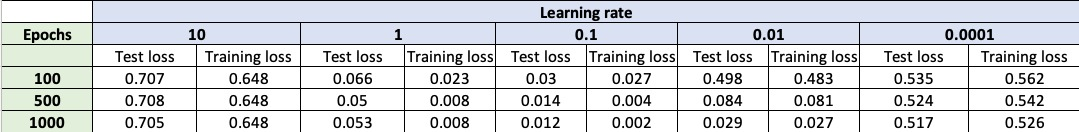

In [12]:
from IPython.display import Image, display

img_path = 'Q2_partC.jpeg'
display(Image(img_path))

**d) (4 pts)** Effect of the number of layers:

1.   Change your activation to ReLU and use a single hidden layer with 4 neurons and then add another hidden layer with 3 neurons and train both your models for 1000 epochs.
2.   Comment on your final models and decision boundaries and observe your training and test loss curves as well.

**Solution d)**

Output using single hidden layer with 4 neurons- Test loss is 0.015 and Train loss is 0.007

Output using two hidden layers, one layer with 4 neurons and another layer with 3 neurons - Test loss is 0.003 and Train loss is 0.001

The model with two hidden layers has lower training and testing losses compared to the single hidden layer model.
Lower losses generally indicate better model performance, suggesting that the additional complexity introduced by the two hidden layers is beneficial.The fact that the training loss is significantly lower than the testing loss in both cases raises the possibility of overfitting, especially in the model with two hidden layers.



**e) (4 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as  sin(𝑋1),𝑋21  etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc.

**Solution e)**

The optimal performance, with train and test errors both at 0.0, was achieved by utilizing features X1^2, X2^2, and X1*X2 in two hidden layers, each with 4 neurons and employing tanh as the activation function. In contrast, a single hidden layer, despite yielding minimal scores, took more epochs (898). Reducing the number of neurons,  also gave us minimum error but again took a large number of epochs.

Using sine functions on X1 and X2 did not effectively reduce errors, with train and test errors remaining above 0.5 and 0.4, respectively. This suggests a limitation in the effectiveness of these features for improving the model's performance.

Hence, the nature of input features and increasing the number of layers and neurons, helped us to minimize error with minimum number of epochs.



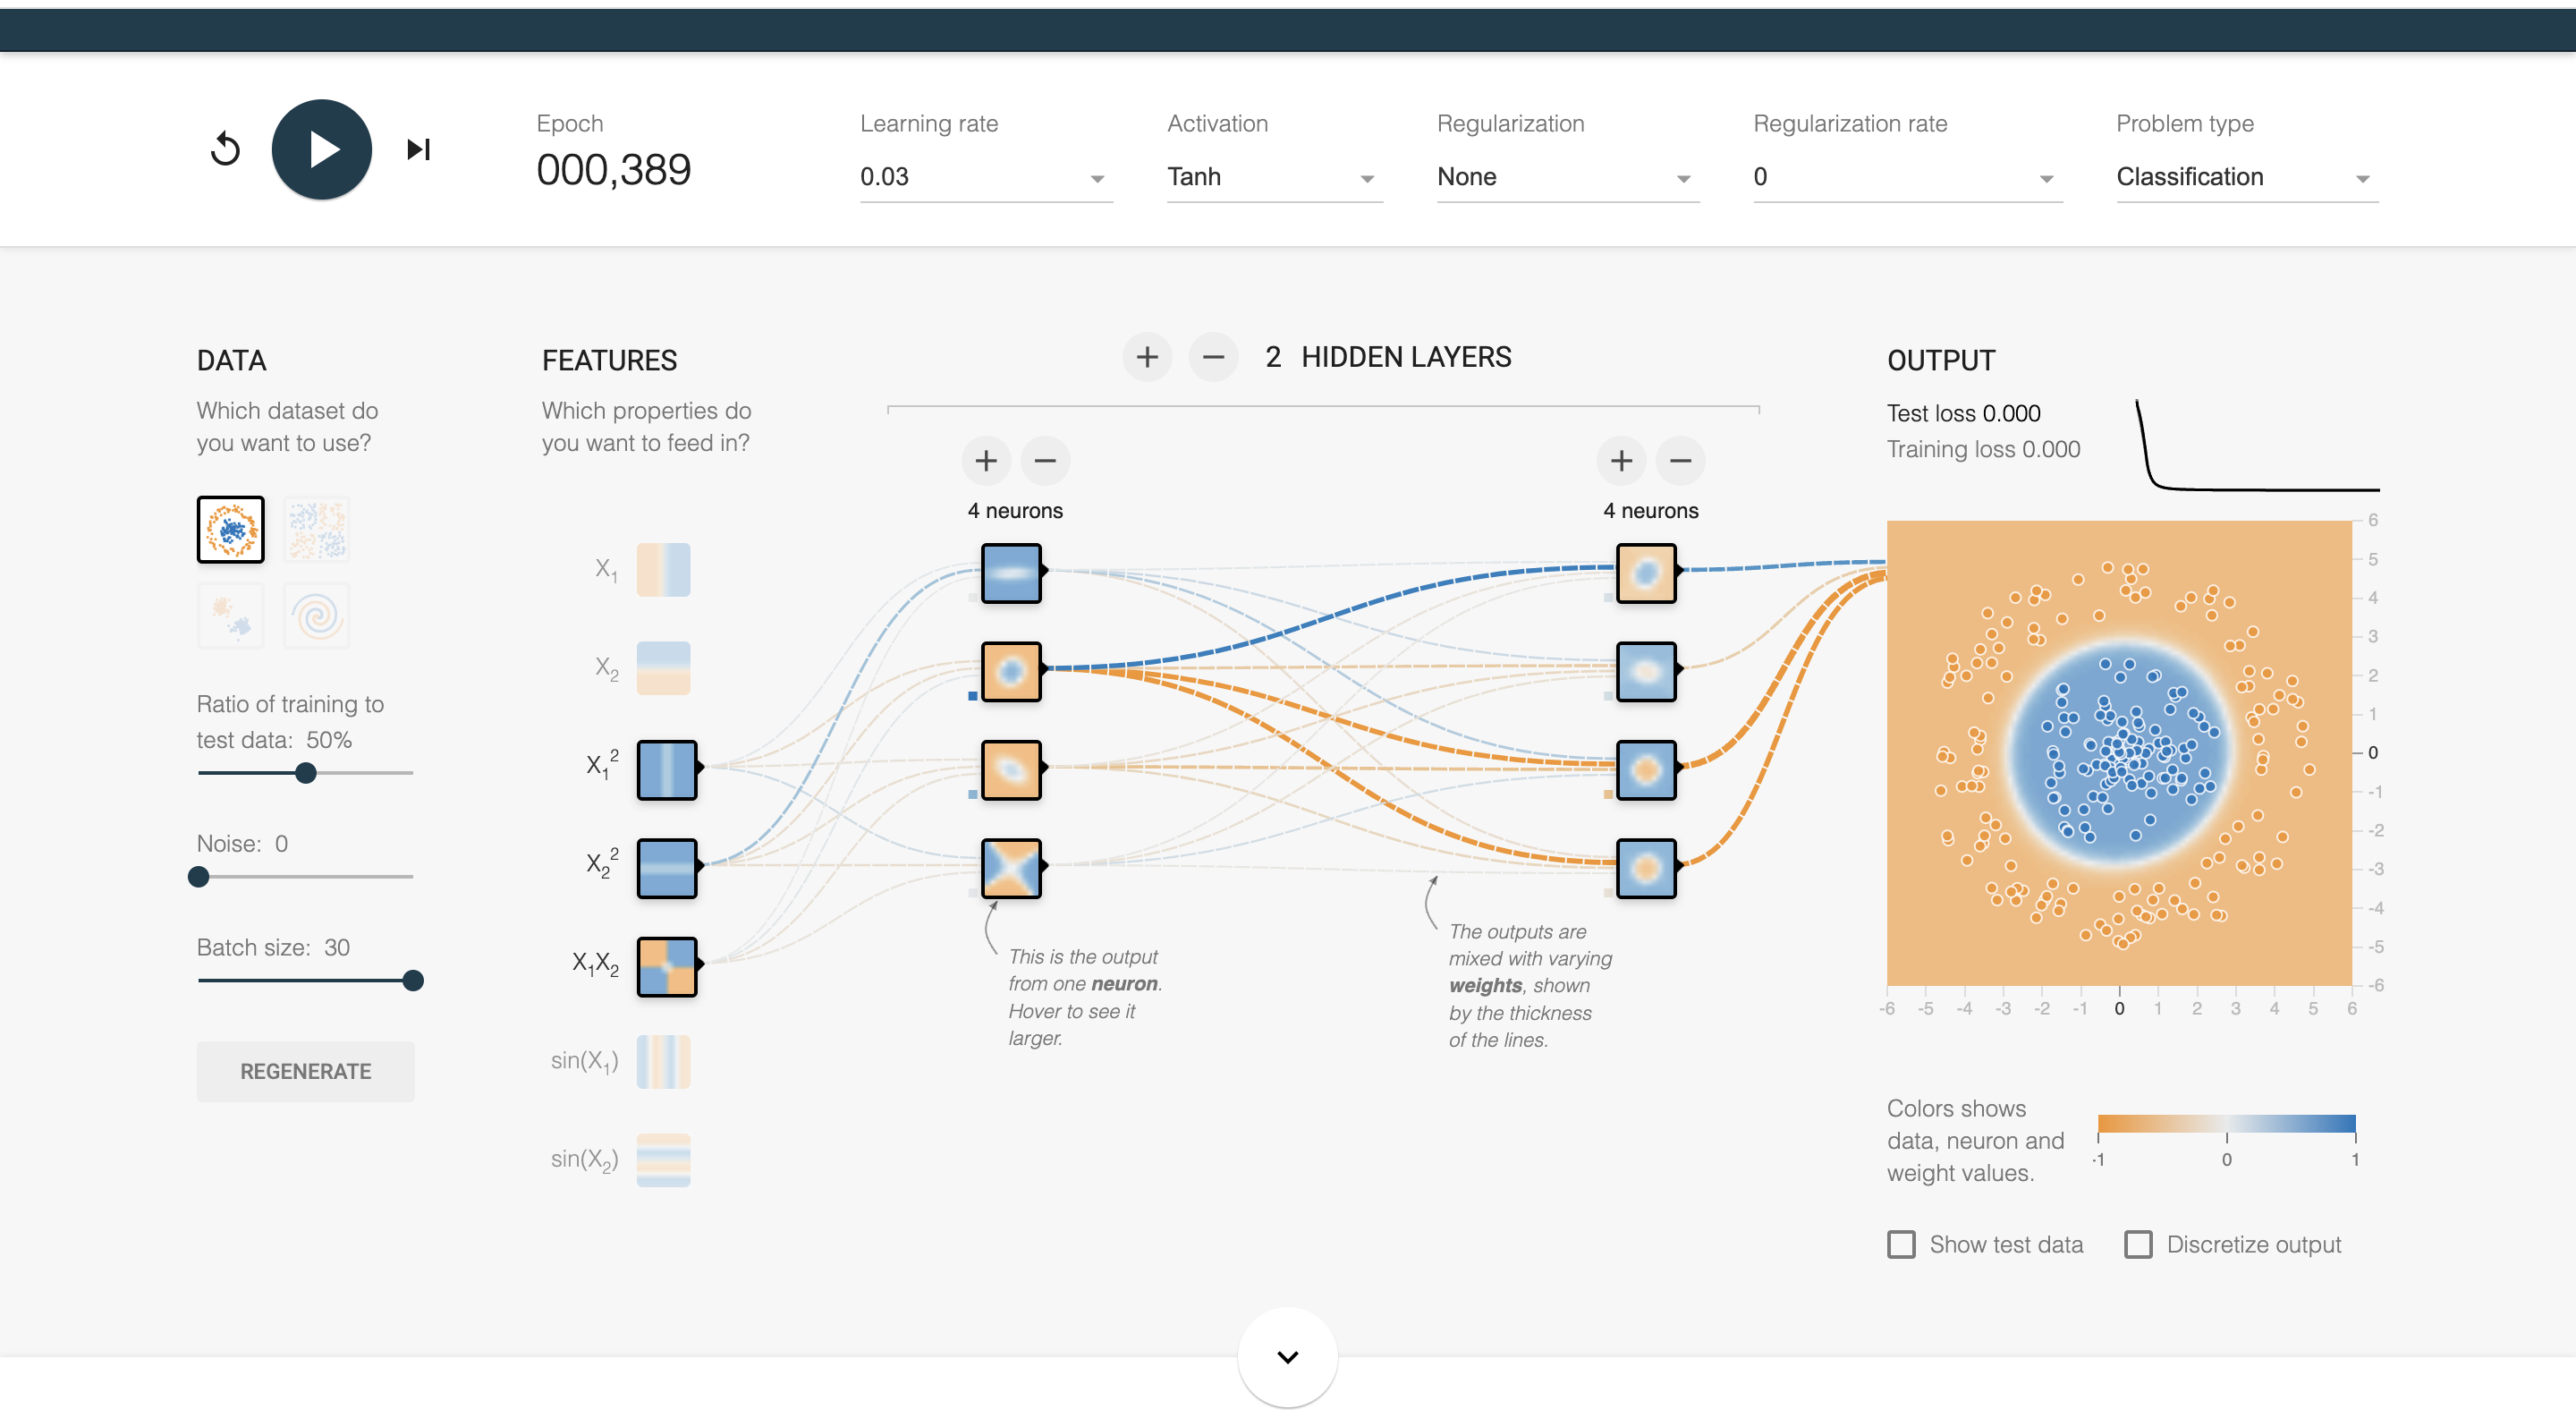

In [13]:
from IPython.display import Image, display

img_path = 'Q2_partE.png'
display(Image(img_path))

# Q3. (10 points) - Principal Component Analysis

**Part 1.** (5 points) Briefly explain the main principle behind the Principal Component Analysis algorithm. In what sense is the selection of the eigenvectors to represent the data an optimal choice.  How do you reconstruct (a noisy version of) the original data from the eigenvectors and the scores?

**Part 2**. (5 points) Read this [article](https://erdem.pl/2020/04/t-sne-clearly-explained) on t-SNE, a dimensionality reduction technique for visualization and explain it in your own words in one or two paragraphs.

**Part 1**

Principal Component Analysis (PCA) is a dimensionality reduction technique. We can use PCA to transform high-dimensional datasets into a lower-dimensions while retaining the maximum amount of information. This can help us to better visualize and interpret the data. The main principle behind PCA involves finding the principal components, which are some form of linear combinations of the original features that capture the maximum variance in the data. Initially, the covariance matrix of the original data is computed, which represents the relationships between different features and provides information about how the features vary together. Then, the eigenvalue decomposition is performed on the covariance matrix, resulting in eigenvalues and corresponding eigenvectors, where the eigenvectors represent the directions along which the data varies the most, and eigenvalues indicate the magnitude of the variance along these directions. The eigenvectors with highest eigenvalues are the principal components. 

In PCA, the eigenvectors to represent the data are chosen in a way that maximizes the variance in the data along each principal component. So, by capturing the directions of maximum explained variance, the first few principal components represent the most significant features in the data, making their selection an optimal choice. 

A noisy version of the original data is reconstructed from the eigenvectors and the scores by multiplying the matrix of selected principal components or eigenvectors with the transpose of the matrix of scores. 

**Reconstructed Data=Selected Eigenvectors × (Transpose of Scores)**

This is a noisy version of the original data since only a few selected principal components will be used in the reconstruction and hence the reconstruction of the original data will not be completely accurate.

**Part 2**

t-SNE (t-distributed Stochastic Neighbor Embedding) is a nonlinear dimensionality reduction algorithm. It works well for separation of clusters that cannot be distinguished by straight lines. It is iterative and non-deterministic resulting in different results on several iterations on with the same data and therefore cannot be used in model training. It is most commonly used for exploratory data analysis and visualization, especially for complex datasets with high dimensionality where linear methods such as PCA cannot effectively capture the underlying relationships.

If we have multiple data points in a high-dimensional space, by calculating pairwise similarities between all data points in the space iteratively, we get a matrix of similarity scores. Similarity score is essentially the conditional probability that a point would select another point as its neighbor. Similarity score is calculated using a Gaussian distribution with variance determined by a parameter called perplexity which controls the number of expected neighbors for each data point in a cluster. Points closer to each other will have higher similarity score and the ones away from each other will have lower similarity score. However, when the data points are clustered more densely together, the distributions may vary due to varying standard deviations across points. To standardize the distribution and to be able to make comparisons across all points, the similarity score is normalized between 0-1, thus resulting in a similarity matrix of all points in the space. Next, using the Student's t-distribution with a very long tail we generate similar probability distribution in the low-dimensional space. Student's t-distribution is used instead of previously used gaussian distribution since it can help with better separation of densely clustered data points. Next, using gradient descent, we optimize the position of each point. The gradient is how close or away each point is from the point of strongest attraction or repulsion, which is similar to the pairwise similarities in the high-dimensional space. The position of each point is adjusted iteratively and repeatedly using the calculated gradient till we get a stable final result. The final result is a low-dimensional visualization where similar points in the original high-dimensional space are likely to be clustered together.

# Q4. (20 points) - Principal Component Analysis

In this problem we will be applying PCA and T-SNE on the Superconductivity Dataset. More details on the dataset is present [here](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#). The goal here is to predict the critical temperature of a superconductor based on the features extracted.

First use Principal Component Analysis (PCA) to solve this problem.  

* **Part 1. (5 points)** Perform the following steps to prepare the dataset:
    * Load the dataset from the "Q4data.csv" file provided as a dataframe df.

    * Select the **'critical_temp'** column as the target column and the rest of the columns from the dataframe df as X.

    * Split the dataset into train and test set with 35% data in test set and random_state = 42

    * Perform [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    `Note: X should have 81 features.`
    




In [14]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv("Q4data.csv")


In [16]:
y = df["critical_temp"]
X = df.drop(columns=["critical_temp"])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scalar = StandardScaler()

### START CODE ###
### Scale the dataset
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
### END CODE ###

* **Part 2 (5 points)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X_train to the following number of components: `[3,20,40,60,81]`. For each of the five datasets, print the cumulative variance explained by the principal components`N = [3,20,40,60,81]`.(i.e. what percentage of variance in the original dataset is explained if we transform the dataset to have 3,20,40,60 and 81 principal components respectively).

  `Note : PCA should be fit on X_train and the components thus learnt should be later used to transform X_test`

In [17]:
from sklearn.decomposition import PCA
nums = [3,20,40,60,81]
res = []
for num in nums:
    ### START CODE ###
    ## Fit PCA
    pca = PCA(n_components=num)
    pca.fit(X_train)
    ### END CODE ###

    ### START CODE ###
    ## Transform Data
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    ### END CODE ###

    ### START CODE ###
    ## Compute explained variance
    explained_variance = pca.explained_variance_ratio_

    # Calculate cumulative variance explained
    var = explained_variance.cumsum()

    # Append the cumulative variance to the result list
    res.append(var[-1])
    ### END CODE ###

    print("Cumulative variance explained by {} components is {}".format(num,var[num-1])) #cumulative sum of variance explained with [n] features



Cumulative variance explained by 3 components is 0.589260501866862
Cumulative variance explained by 20 components is 0.9694153323965278
Cumulative variance explained by 40 components is 0.9961367321446168
Cumulative variance explained by 60 components is 0.9995314265924459
Cumulative variance explained by 81 components is 1.0000000000000002


* **Part 3. (5 points)** Plot the cumulative variance explained by the principal components using the training data. The plot should display the number of components on X-axis and the cumulative explained variance on the y-axis. What do you understand from the plot obtained?

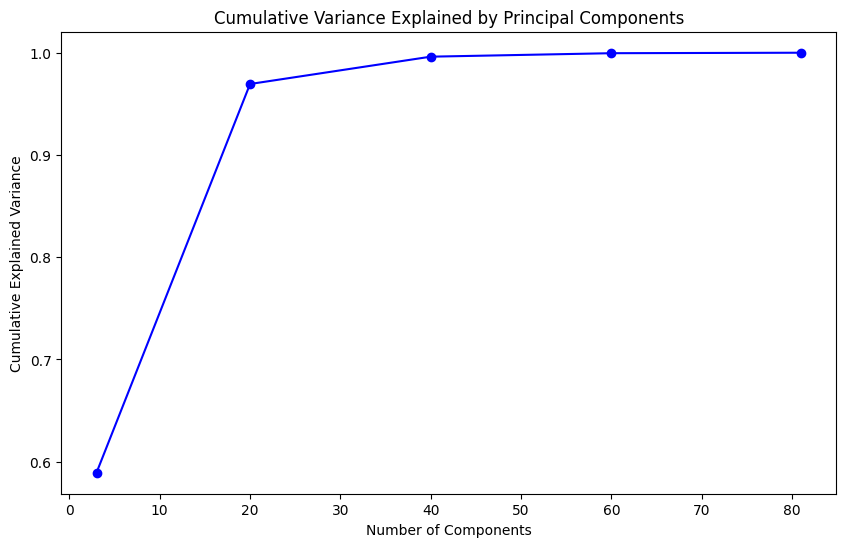

In [18]:
### START CODE ###
## Plot the explained variance vs number of components
plt.figure(figsize=(10, 6))
plt.plot(nums, res, marker='o', linestyle='-', color='b')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
### END CODE ###
plt.show()

**Obsevation from plot**


From this plot, we can see:

- The most variance in the data is explained by the first principle component, which is followed by the second and so on. We can see this from the cumulative sum graph above.
- More of the overall variance included in the initial data is captured as more components are added. This indicates that more data from the original dataset is captured in our new representation.




* **Part 4. (5 points)** For each of the reduced dataset, obtained in part 2.2, fit a linear regression model on the train data and show how adjusted $R^2$ varies as a function of # of components.(There will be a total of 5 ${R^2}$ score).


In [19]:
from sklearn.decomposition import PCA
nums = [3,20,40,60,81]
res = []
for num in nums:

    ### START CODE ###
    ## Fit PCA components
    pca = PCA(n_components=num)
    pca.fit(X_train)
    ### END CODE ###


    ### START CODE ###
    ## Transform train and test data
    X_train_pca = pca.transform(X_train)
    X_test_new = pca.transform(X_test)
    ### END CODE ###

    ### START CODE ###
    ## Compute explained variance
    explained_variance = pca.explained_variance_ratio_
    # Calculate cumulative variance explained
    var = explained_variance.cumsum()
    # Append the cumulative variance to the result list
    res.append(var[-1])
    ### END CODE ###

    ### START CODE ###
    ## Fit LR and compute R-square and adjusted R-squared
    linear_reg = LinearRegression()
    linear_reg.fit(X_train_pca, Y_train )
    y_pred = linear_reg.predict(X_test_new)
    r_squared = r2_score(Y_test, y_pred)
    ### END CODE ###

    adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test_new.shape[1]-1)
    print("Adjusted R^2",adjusted_r_squared)

Adjusted R^2 0.4889533521320415
Adjusted R^2 0.6203310065198187
Adjusted R^2 0.6845706245496108
Adjusted R^2 0.7118276428374883
Adjusted R^2 0.7246468397073272


# Q5. (10 points) PCA vs T-SNE
* **Part 1.** **(3 points)** Now apply T-SNE to the dataset given above in Q4. You are required to carry out the following tasks:



1.   Initialize a t-SNE model with number of dimensions = 3, perplexity = 300, number of iterations = 300 and random state = 42
2.   Apply the t-SNE model to the training dataset











In [20]:
from sklearn.manifold import TSNE

### START CODE ###
## Initialize t-SNE model
tsne_model = TSNE(n_components=3, perplexity=300, n_iter=300, random_state=42)
### END CODE ###

### START CODE ###
## Fit and transform the data
X_train_tsne = tsne_model.fit_transform(X_train)
### END CODE ###

* **Part 2.** (3 points) For this part use a small subset of 500 samples of the training dataset and plot the first three t-SNE components similar to the PCA implementation above

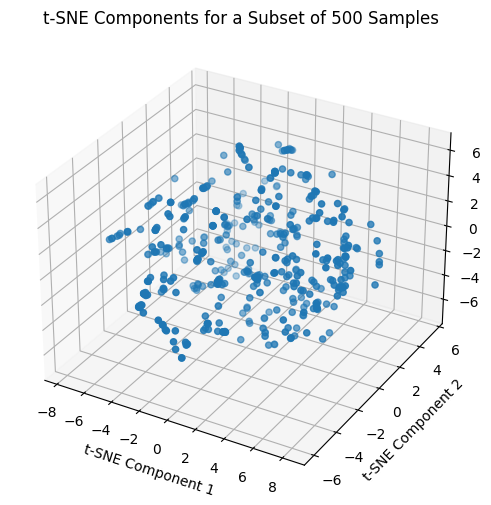

In [21]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting library

# Create a small subset of 500 samples from X_train_tsne
subset_size = 500
X_train_tsne_subset = X_train_tsne[:subset_size]

# Create a new figure and 3D axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the t-SNE components
scatter = ax.scatter(X_train_tsne_subset[:, 0], X_train_tsne_subset[:, 1], X_train_tsne_subset[:, 2])

# Set axis labels
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

# Set plot title
plt.title('t-SNE Components for a Subset of 500 Samples')

# Show the plot
plt.show()


* **Part 3. (4 points)** Now we will plot the PCA and t-SNE projections of the data and compare the plots side-by-side to see the difference in scatters created by the two methods. You can use first 1000 data points for this.

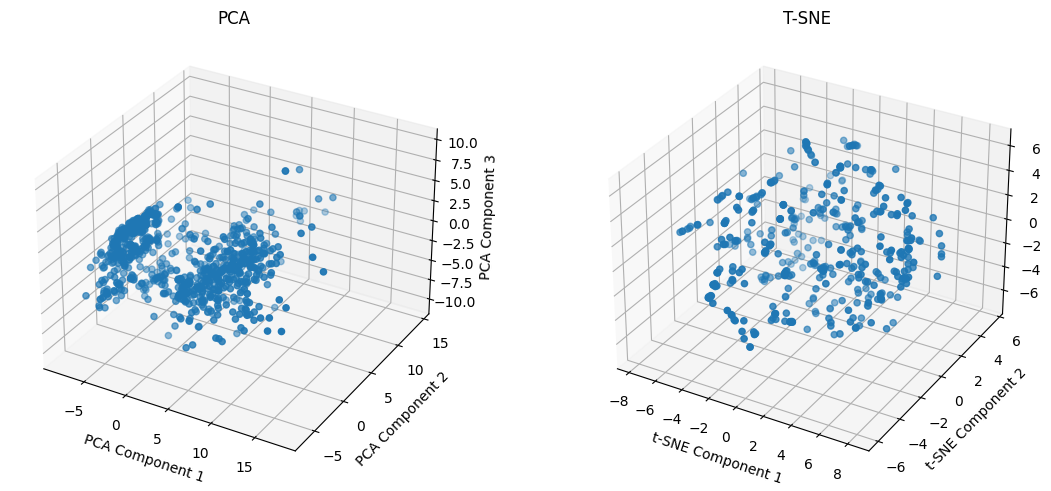

In [22]:
fig = plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

# First subplot (left)

### START CODE ###
### Obtain components from PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
subset_size = 1000
X_train_pca_subset = X_train_pca[:subset_size]
### END CODE ###

# plt.subplot(1, 2, 1)  # 1 row, 2 columns, select the first subplot
ax1 = fig.add_subplot(121, projection='3d')
plt.title('PCA')

# ### START CODE ###
# ### scatter plot for PCA
scatter = ax1.scatter(X_train_pca_subset[:, 0], X_train_pca_subset[:, 1], X_train_pca_subset[:, 2])

# Set axis labels
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_zlabel('PCA Component 3')
# ### END CODE ###


# # Second subplot (right)
# plt.subplot(1, 2, 2)  # 1 row, 2 columns, select the second subplot
ax2 = fig.add_subplot(122, projection='3d')
# ### START CODE ###
# ### scatter plot for t-SNE
# Scatter plot the t-SNE components
scatter = ax2.scatter(X_train_tsne_subset[:, 0], X_train_tsne_subset[:, 1], X_train_tsne_subset[:, 2])

# Set axis labels
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')
ax2.set_zlabel('t-SNE Component 3')
# ### END CODE ###

plt.title('T-SNE')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()